In [21]:
# %% Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/ColabNotebooks/"
%cd /content/drive/MyDrive/Colab\ Notebooks/Cantilever

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Cantilever


In [22]:
!ls 

Cantilever.dat	CantileverDemo.ipynb


In [23]:
# %% Load and manipulate the data
# Load data from Cantilever.dat
beam_data = pd.read_table("Cantilever.dat", header=None)
# Copy data from each column into new variables
mass = beam_data.iloc[:, 0].copy()
disp = beam_data.iloc[:, 1].copy()
# Convert mass to a force measurement
force = mass * 9.81
# Convert displacement in inches to meters
disp = (disp * 2.54) / 100.0

In [24]:
# %% Perform calculations
# Use polyfit to find first-order fit polynomials
p = np.polyfit(force, disp, 1)
print(p)

[0.00335781 0.00054645]


In [25]:
# %% Generate predictions
# Create 100 representational force values
force_model = np.linspace(force.min(), force.max(), 100)
# Calculate displacement predictions
disp_model = np.polyval(p, force_model)

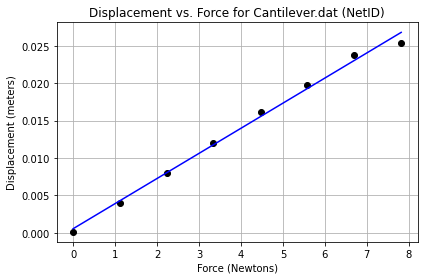

In [26]:
# %% Generate and save plots
# Create a Figure and Axes
fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1)
# Plot Displacement as a function of Force
ax.plot(force, disp, "ko")
# Plot the model values
ax.plot(force_model, disp_model, "b-")
# Turn the grid on
ax.grid(True)
# Label and title the graph
ax.set(
    xlabel="Force (Newtons)",
    ylabel="Displacement (meters)",
    title="Displacement vs. Force for Cantilever.dat (NetID)",
)
# Use tight layout
fig.tight_layout()
# Save the graph to Encapsulated PostScript, PDF, and PNG
fig.savefig("RunCanPlot.eps")
fig.savefig("RunCanPlot.pdf")
fig.savefig("RunCanPlot.png")